<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
Student ID: C00294114  

Dataset split dog/cat: train[753]/ val[251]  
The dataset is shared on microsift one drive and will need to be transfered to google colab account for it to run in this code.  

The image dataset is taken from Kaggle at https://www.kaggle.com/datasets/erkamk/cat-and-dog-images-dataset?select=Dog+and+Cat+.png , it consistes of images of dogs and cats


In logistic regression the following can be changed  
* learning rate
* iterations
* dataset
* logistic function e.g. ReLU, sigmoid

## Share data with greg


A simple logistic regression is performed first using a generated dataset before logistic regression is perfromed using an image datset.  
The example is taken from https://colab.research.google.com/github/mravanba/comp551-notebooks/blob/master/LogisticRegression.ipynb#scrollTo=MTG1cHCdfYC0 and changed to give different results.  
Logistic regression deals with binary classification

To begin with the needed liabaries need to be imported  
PyTorch an open source machine learning (ML) framework based on the Python programming language and the Torch library

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


The logistic function is defined as $\sigma(z) = \frac{1}{1+e^{-z}}$  
If z >> 0 the logistic function is 1  
If z<< 0 the logistic function is 0
Logistic regression assumes that the dependent variable is binary e.g. is the image a dog or a cat (Y/N).  
Logistic regression fits the data with a logistic curve rather than a line.  
By using the sigmoid function the output is fitted between 0 to 1.  
The logistic curve is plotted between -15 and 15 on the x-axis, 0 to 1 on the y axis



Text(0.5, 1.0, 'logistic function')

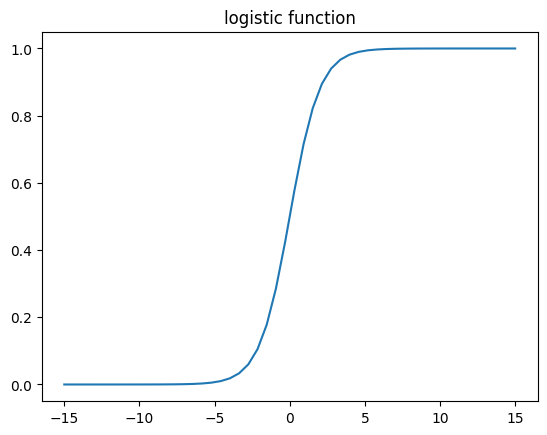

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-15,15)
plt.plot(z, logistic(z))
plt.title('logistic function')

The cost function is used to measure the error between the predicted probabilities and true class labels.  
It can also be known as the binary cross-entropy loss function.  
The equatio looks like this $$
J(w) = \sum_n y^{(n)} \log(1+e^{-x w^\top}) + (1-y^{(n)}) \log(1+e^{x w^\top})
$$

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J

In logistic regression gradient descent can  be used to reduce the cost value of the function.  
The cost is divided by N

In [ ]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))
    grad = np.dot(x.T, yh - y)/N
    return grad

Classifiying the logistic regression class

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0

        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
        return yh

LogisticRegression.gradient = gradient


Fitting the model to a user generted dataset.  
There is a hundred data points fitted to the plot space.  
The model is fitted to the data to try predict its binary classifiction.  
The dataset is then fitted to the logistic curve.  
It is seen that the curve is not a perfect fit as some points hange of the curve

terminated after 100000 iterations, with norm of the gradient equal to 0.0005570620326455077
the weight found: [-6.78806383 14.29490123]


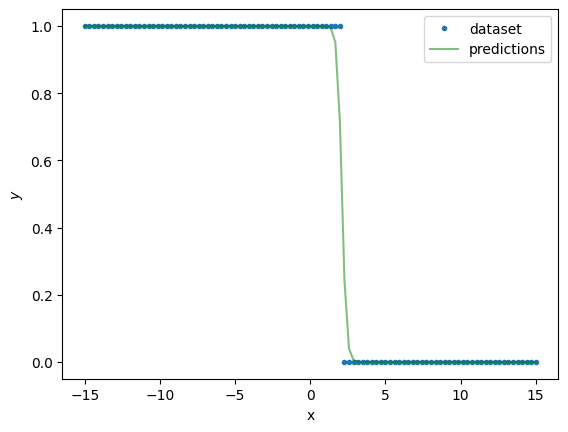

In [ ]:
N = 100
x = np.linspace(-15,15, N)
y = ( x < 2).astype(int)
model = LogisticRegression(verbose=True, )
yh = model.fit(x,y).predict(x)
plt.plot(x, y, '.', label='dataset')
plt.plot(x, yh, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

By using model weights it is possible to plot cost as a function for logistic regrression.  
The diffferent choice of weights have different costs and can effect logistic regression fit.

In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Plotting the different logistic regression functions on the dataset.  
The different lines have different colours.  
From all the logistic fits the red one seems to be the best fit for the data.

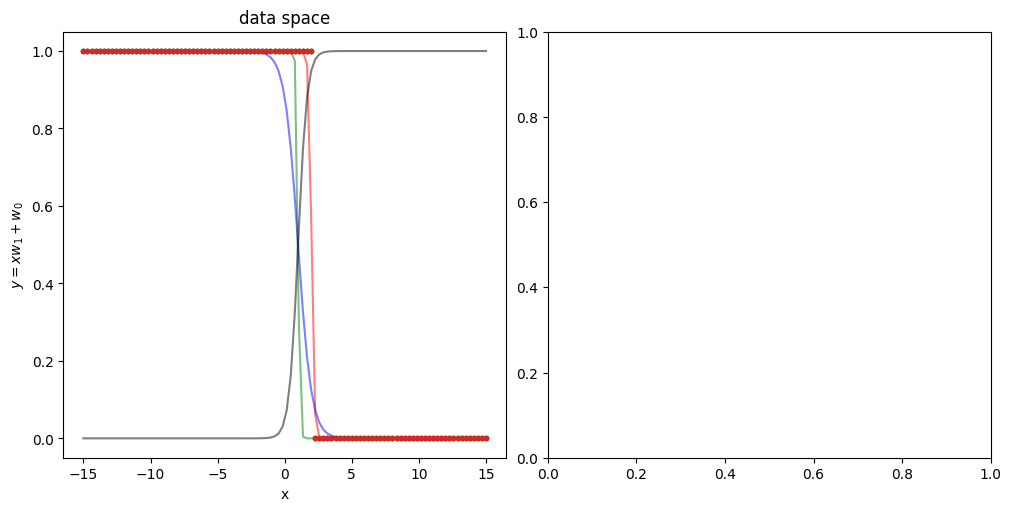

In [ ]:
x_plus_bias = np.column_stack([x,np.ones(x.shape[0])])
cost_w = lambda param: cost_fn(x_plus_bias, y, param)           #define the cost just as a function of parameters
colors = ['r','g', 'b', 'k']
model_list = [(-10, 20),(-15,15), (-2, 2), (3,-3)]
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10, 5))
for i, w in enumerate(model_list):
    axes[0].plot(x, y, '.')
    axes[0].plot(x, logistic(w[1] + np.dot(w[0], x)), '-'+colors[i], alpha=.5)
axes[0].set_xlabel('x')
axes[0].set_ylabel(r'$y=xw_1 + w_0$')
axes[0].set_title('data space')
plt.show()

Now I attempt to use logistic regression with a large image dataset.  
The code used is adapted from https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-18-pytorch_logistic_regression.ipynb#scrollTo=L7Boavtx22CS

All the needed libaries are imported at the begining of the code.  
The model will use neural networks and perform simple binary image classification.

Checking if the device uses cpu or cuda

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cpu


This model aims to classify if image is dog or not (cat).  
The dataset is very large so it will be imported from google drive.  
Monuting the notebook to google drive

In [ ]:

from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


Connecting the data folder on gdrive

In [ ]:

data_dir = 'gdrive/My Drive/logistic'

The images will then be transformed to all have the same properties.  
The images are resized, cropped, reshaped and normalised

In [ ]:

class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result


data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
}


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}


train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Printing a sample image from the dataset

Dimension of image: torch.Size([751, 150528]) 
 Dimension of labels torch.Size([751])


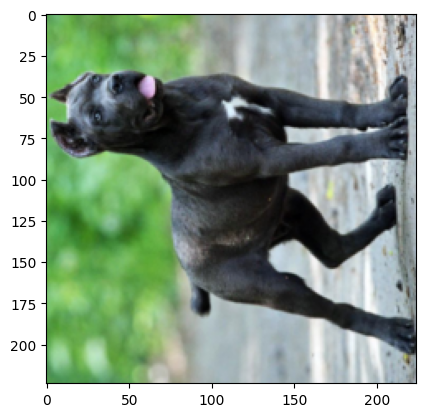

In [ ]:

x, y = next(iter(train_dataset))

dim = x.shape[1]
print("Dimension of image:", x.shape, "\n",
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

Buildig the logistic regression model.  
_ init _ is used to train the model with backpropagation.  
The model hopes to learn the weights in order to minimize the cost of the model

In [ ]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x)
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)

    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

Testing the model to get its cost and accuracy values

In [ ]:
## model pretesting
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(49.9334)


Training the model by setting the number of iterations of the model, and the learning rate.  
After each iteration the following values are printed Cost, Train Acc, Test Acc.  
The learning rate was set to 0.0001 as it seemed to give lower cost values in comparison to other values such as 0.0005 gave higher cost values over iteration, 0.01 gave Nan values for cost.  
The number of iterations was set to 250 because as anything longer took a long time to run

In [ ]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0)
    return x_flatten, y

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)

    # backward
    lrmodel.backward(x.to(device),
                    yhat.to(device),
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i,
                                                                                    cost,
                                                                                    train_pred,
                                                                                    test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 10: 0.6877979040145874 | Train Acc: 59.25432586669922 | Test Acc: 57.83132553100586
Cost after iteration 20: 0.6832494735717773 | Train Acc: 60.71903991699219 | Test Acc: 55.02008056640625
Cost after iteration 30: 0.6792138814926147 | Train Acc: 62.982688903808594 | Test Acc: 54.21686935424805
Cost after iteration 40: 0.6755650639533997 | Train Acc: 62.583221435546875 | Test Acc: 53.41365432739258
Cost after iteration 50: 0.6722191572189331 | Train Acc: 62.982688903808594 | Test Acc: 53.81526184082031
Cost after iteration 60: 0.6691185832023621 | Train Acc: 63.38215637207031 | Test Acc: 54.618473052978516
Cost after iteration 70: 0.6662225723266602 | Train Acc: 63.51531219482422 | Test Acc: 54.21686935424805
Cost after iteration 80: 0.6635009050369263 | Train Acc: 63.51531219482422 | Test Acc: 55.02008056640625
Cost after iteration 90: 0.6609306931495667 | Train

Plotting the loss curve as the number of iteration increases the model beging to classify the images quicker

In [ ]:
plt.plot(costs)
plt.show()

In [ ]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 250
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0)
    return x_flatten, y

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)

    # backward
    lrmodel.backward(x.to(device),
                    yhat.to(device),
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i,
                                                                                    cost,
                                                                                    train_pred,
                                                                                    test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 10: 0.6877979040145874 | Train Acc: 59.25432586669922 | Test Acc: 57.83132553100586
Cost after iteration 20: 0.6832494735717773 | Train Acc: 60.71903991699219 | Test Acc: 55.02008056640625
Cost after iteration 30: 0.6792138814926147 | Train Acc: 62.982688903808594 | Test Acc: 54.21686935424805
Cost after iteration 40: 0.6755650639533997 | Train Acc: 62.583221435546875 | Test Acc: 53.41365432739258
Cost after iteration 50: 0.6722190976142883 | Train Acc: 62.982688903808594 | Test Acc: 53.81526184082031
Cost after iteration 60: 0.6691185832023621 | Train Acc: 63.38215637207031 | Test Acc: 54.618473052978516
Cost after iteration 70: 0.6662225127220154 | Train Acc: 63.51531219482422 | Test Acc: 54.21686935424805
Cost after iteration 80: 0.663500964641571 | Train Acc: 63.51531219482422 | Test Acc: 55.02008056640625
Cost after iteration 90: 0.6609306931495667 | Train 

KeyboardInterrupt: 

In [ ]:
# ## hyperparams
# costs = []
# dim = x_flatten.shape[0]
# learning_rate = torch.scalar_tensor(0.01).to(device)
# num_iterations = 100
# lrmodel = LR(dim, learning_rate)
# lrmodel.to(device)

# ## transform the data
# def transform_data(x, y):
#     x_flatten = x.T
#     y = y.unsqueeze(0)
#     return x_flatten, y

# ## training the model
# for i in range(num_iterations):
#     x, y = next(iter(train_dataset))
#     test_x, test_y = next(iter(test_dataset))
#     x, y = transform_data(x, y)
#     test_x, test_y = transform_data(test_x, test_y)

#     # forward
#     yhat = lrmodel.forward(x.to(device))
#     cost = loss(yhat.data.cpu(), y)
#     train_pred = predict(yhat, y)

#     # backward
#     lrmodel.backward(x.to(device),
#                     yhat.to(device),
#                     y.to(device))
#     lrmodel.optimize()
#     ## test
#     yhat_test = lrmodel.forward(test_x.to(device))
#     test_pred = predict(yhat_test, test_y)

#     if i % 10 == 0:
#         costs.append(cost)

#     if i % 10 == 0:
#         print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i,
#                                                                                     cost,
#                                                                                     train_pred,
#                                                                                     test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 10: nan | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 20: nan | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 30: nan | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 40: nan | Train Acc: 50.46604537963867 | Test Acc: 49.799198150634766
Cost after iteration 50: nan | Train Acc: 50.59920120239258 | Test Acc: 49.799198150634766
Cost after iteration 60: nan | Train Acc: 50.59920120239258 | Test Acc: 49.799198150634766
Cost after iteration 70: nan | Train Acc: 50.59920120239258 | Test Acc: 49.799198150634766
Cost after iteration 80: nan | Train Acc: 50.59920120239258 | Test Acc: 49.799198150634766
Cost after iteration 90: nan | Train Acc: 50.9986686706543 | Test Acc: 50.200801849365234


In [ ]:
# ## hyperparams
# costs = []
# dim = x_flatten.shape[0]
# learning_rate = torch.scalar_tensor(0.0005).to(device)
# num_iterations = 100
# lrmodel = LR(dim, learning_rate)
# lrmodel.to(device)

# ## transform the data
# def transform_data(x, y):
#     x_flatten = x.T
#     y = y.unsqueeze(0)
#     return x_flatten, y

# ## training the model
# for i in range(num_iterations):
#     x, y = next(iter(train_dataset))
#     test_x, test_y = next(iter(test_dataset))
#     x, y = transform_data(x, y)
#     test_x, test_y = transform_data(test_x, test_y)

#     # forward
#     yhat = lrmodel.forward(x.to(device))
#     cost = loss(yhat.data.cpu(), y)
#     train_pred = predict(yhat, y)

#     # backward
#     lrmodel.backward(x.to(device),
#                     yhat.to(device),
#                     y.to(device))
#     lrmodel.optimize()
#     ## test
#     yhat_test = lrmodel.forward(test_x.to(device))
#     test_pred = predict(yhat_test, test_y)

#     if i % 10 == 0:
#         costs.append(cost)

#     if i % 10 == 0:
#         print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i,
#                                                                                     cost,
#                                                                                     train_pred,
#                                                                                     test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 10: 1.7524770498275757 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 20: 1.741275668144226 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 30: 1.7186521291732788 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 40: 1.6967670917510986 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 50: 1.674890160560608 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 60: 1.6529278755187988 | Train Acc: 49.93342208862305 | Test Acc: 49.799198150634766
Cost after iteration 70: 1.631191372871399 | Train Acc: 50.06657791137695 | Test Acc: 49.799198150634766
Cost after iteration 80: 1.6100670099258423 | Train Acc: 50.332889556884766 | Test Acc: 49.799198150634766
Cost after iteration 90: 1.5898234844207764 | Tra

this model does not have a high accuracy rate but after changing the learning rate and iteration values multiple times to no sucess i am unsre about how to fix this